In [1]:
import cv2
import tensorflow as tf

In [2]:
im = tf.keras.utils.get_file('Naxos_Taverna.jpg','https://upload.wikimedia.org/wikipedia/commons/6/60/Naxos_Taverna.jpg')
im_cv = cv2.imread(im)
im_d = im_cv[...,::-1].copy()
h, w, c = im_d.shape

In [53]:
h

1024

In [54]:
w

1536

In [6]:
blob = cv2.dnn.blobFromImage(im_cv, 1/255, (416,416))

In [ ]:
# tf.keras.backend.function

In [25]:
# cv2.dnn.readNet
# model = cv2.dnn.readNetFromDarknet('yolov2-tiny.cfg.txt', 'yolov2-tiny.weights')
model = cv2.dnn.readNetFromDarknet('yolov3.cfg.txt', 'yolov3.weights')
model.setInput(blob)

In [27]:
layer_names = model.getLayerNames()

In [28]:
layer_names

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [5]:
dir(model)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'connect',
 'dump',
 'dumpToFile',
 'empty',
 'enableFusion',
 'forward',
 'forwardAndRetrieve',
 'forwardAsync',
 'getFLOPS',
 'getInputDetails',
 'getLayer',
 'getLayerId',
 'getLayerNames',
 'getLayerTypes',
 'getLayersCount',
 'getLayersShapes',
 'getMemoryConsumption',
 'getOutputDetails',
 'getParam',
 'getPerfProfile',
 'getUnconnectedOutLayers',
 'getUnconnectedOutLayersNames',
 'quantize',
 'readFromModelOptimizer',
 'setHalideScheduler',
 'setInput',
 'setInputShape',
 'setInputsNames',
 'setParam',
 'setPreferableBackend',
 'setPreferableTarget']

In [ ]:
# hub에서 가져온 모델

In [29]:
model.setInput(blob)
# results = model.forward('detection_out')
results = model.forward('yolo_106')
# results = model.forward(['yolo_106']) # c.f results[0]

In [30]:
results.shape

(8112, 85)

In [31]:
with open('coco.names.txt') as f:
    coco = f.read()
    coco = coco.split('\n')  # 주의 protobuf

In [38]:
for i in results:
    for j in i:
        print(j)

0.010801377
0.008220647
0.018306354
0.015171306
2.8271204e-05
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.011575922
0.012807116
0.023601234
0.09740187
7.050576e-07
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.011148701
0.010939868
0.15834147
0.025019586
3.3844083e-07
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.8965143
0.3379801
0.01358391
0.037489798
4.636413e-07
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.8976705
0.33764026
0.034676347
0.09641569
5.3234435e-06
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [32]:
import numpy as np

In [90]:
boxes = []
confidence_scores = []

In [91]:
for d in results:
    scores = d[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.5:
        center_x = int(d[0] * w)
        center_y = int(d[1] * h)
        dw = int(d[2] * w)
        dh = int(d[3] * h)
        x = int(center_x - dw/2)
        y = int(center_y - dh/2)
        boxes.append([x,y,dw,dh])
        confidence_scores.append(confidence)

In [97]:
tf.image.non_max_suppression(boxes, confidence_scores, 5)

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([8, 5, 4, 1], dtype=int32)>

In [93]:
boxes, confidence_scores

([[1437, 530, 63, 60],
  [659, 613, 56, 22],
  [795, 603, 78, 25],
  [1145, 634, 47, 77],
  [1163, 632, 62, 82],
  [1, 743, 108, 76],
  [-1, 737, 128, 83],
  [133, 741, 67, 87],
  [140, 752, 53, 83]],
 [0.6095738,
  0.57146287,
  0.54714215,
  0.51037186,
  0.6101517,
  0.8821544,
  0.58705217,
  0.55523735,
  0.9680049])

In [94]:
b = cv2.dnn.NMSBoxes(boxes, confidence_scores, 0.5, 0.5) # box 모양일까?

In [95]:
b

array([8, 5, 4, 0, 1, 2, 3], dtype=int32)

In [79]:
boxes[8], boxes[5]

([140, 752, 53, 83], [1, 743, 108, 76])

In [80]:
np.array(boxes)[[b]]

/var/folders/9k/jsf_2t1d6ts48d1mpfj3nxp00000gn/T/ipykernel_11452/2879219484.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  np.array(boxes)[[b]]


array([[ 140,  752,   53,   83],
       [   1,  743,  108,   76],
       [1163,  632,   62,   82],
       [1437,  530,   63,   60],
       [ 659,  613,   56,   22],
       [ 795,  603,   78,   25],
       [1145,  634,   47,   77]])

In [81]:
nms_box = np.array(boxes)[b]

In [82]:
nms_box

array([[ 140,  752,   53,   83],
       [   1,  743,  108,   76],
       [1163,  632,   62,   82],
       [1437,  530,   63,   60],
       [ 659,  613,   56,   22],
       [ 795,  603,   78,   25],
       [1145,  634,   47,   77]])

In [83]:
im_cv = cv2.imread(im)
im_d = im_cv[...,::-1].copy()

In [84]:
for i in nms_box:
    cv2.rectangle(im_d, (i[0],i[1]), (i[0]+i[2], i[1]+i[3]), color=(255,0,0), thickness=5)

In [85]:
import matplotlib.pyplot as plt

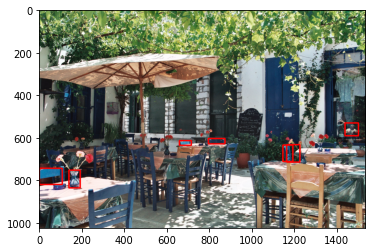

In [86]:
plt.imshow(im_d)

In [101]:
f = tf.io.read_file('DL.jpg') # gpu 처리
# im = tf.image.decode_jpeg(f)
im = tf.image.decode_image(f)

In [103]:
im2 = tf.image.central_crop(im, 0.5)

In [105]:
im3 = tf.image.flip_left_right(im) # 거울반사

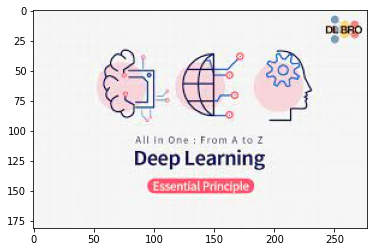

In [107]:
plt.imshow(im)

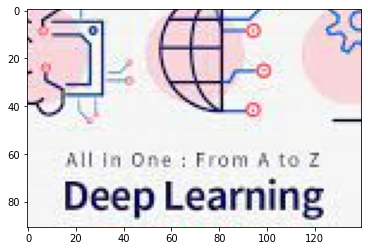

In [108]:
plt.imshow(im2) # crop

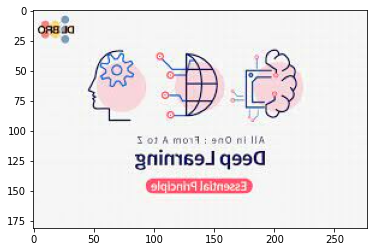

In [109]:
plt.imshow(im3) # 거울반사

In [34]:
for i in results:
    if np.argmax(i[5:]) != 0:
        boxes.append(np.argmax(i[5:]))

In [35]:
len(boxes)

21

In [37]:
coco[51]

'carrot'

In [ ]:
5 - 1
56 - 52

In [36]:
boxes

[56,
 56,
 56,
 56,
 60,
 60,
 60,
 56,
 56,
 56,
 41,
 56,
 56,
 60,
 56,
 56,
 56,
 75,
 56,
 75,
 45]

In [ ]:
# hub에서 가져온 모델

In [ ]:
cv2.dnn.NMSBoxes

In [ ]:
tf.image.non_max_suppression